# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [22]:
import logging
import sys

# Configure logging to output to stdout and set level to DEBUG
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Example info message
logging.info("This is an info message")
# Example debug message
logging.debug("This is a debug message")

INFO:root:This is an info message


In [23]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)


In [24]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

## Country and period of interest

Choose country and years of interest

In [25]:
import comtradetools


country_of_interest_name = 'Guinea-Bissau'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, country_of_interest, years_of_interest)

Guinea-Bissau 624 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [26]:
from datetime import datetime

current_datetime = datetime.now()
print(f"Start run for {country_of_interest_name}:", current_datetime)

Start run for Guinea-Bissau: 2024-06-19 20:46:45.109069


## 1.Trade balance

### 1a Trade balance symmetric values

In [27]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

global_trade = comtradetools.get_trade_flows(country_of_interest,
                                        period=years_of_interest,
                                        period_size=1,  # how may years fetched in one call
                                        retry_if_empty=False,
                                        symmetric_values=True)

cols_of_interest = global_trade.columns



INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
INFO:root:Calling getFinalData for peri

In [28]:
global_trade['varM_perc']=global_trade['M']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Guinea-Bissau
X = Exports as reported by Guinea-Bissau
X<M = Exports as reported by rest of the world imports from Guinea-Bissau
M<X = Imports as reported by rest of the world exports to Guinea-Bissau


flowCode,M,M<X,X,X<M,trade_balance (X-M),trade_balance (X<M-M),trade_volume (X+M),trade_volume (X<M+M),varM_perc,varX_perc
period,,,,,,,,,,
2003,"63,867,748.00","105,645,294.83","61,366,793.00","76,057,167.69","-2,500,955.00","12,189,419.69","125,234,541.00","139,924,915.69",0.60,0.81
2004,"57,146,685.00","111,677,485.26","54,124,875.00","113,373,821.66","-3,021,810.00","56,227,136.66","111,271,560.00","170,520,506.66",0.51,0.48
2005,"111,684,811.00","187,104,418.85","23,244,874.00","103,523,650.54","-88,439,937.00","-8,161,160.46","134,929,685.00","215,208,461.54",0.60,0.22
2006,0.00,"157,011,745.28",0.00,"53,729,316.44",0.00,"53,729,316.44",0.00,"53,729,316.44",0.00,0.00
2007,0.00,"205,879,148.76",0.00,"84,979,661.82",0.00,"84,979,661.82",0.00,"84,979,661.82",0.00,0.00
2008,0.00,"240,942,359.01",0.00,"142,847,492.06",0.00,"142,847,492.06",0.00,"142,847,492.06",0.00,0.00
2009,0.00,"289,852,540.98",0.00,"108,728,393.21",0.00,"108,728,393.21",0.00,"108,728,393.21",0.00,0.00
2010,0.00,"232,625,732.34",0.00,"167,085,429.44",0.00,"167,085,429.44",0.00,"167,085,429.44",0.00,0.00
2011,0.00,"325,427,766.49",0.00,"385,401,771.14",0.00,"385,401,771.14",0.00,"385,401,771.14",0.00,0.00


Save to Excel file

In [29]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Guinea-Bissau_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Guinea-Bissau_1.2_trade_balance_2003-2023.png
0 Line2D(M) 0.0
1 Line2D(M<X) 0.8
2 Line2D(X) 0.0
3 Line2D(X<M) 0.8
4 Line2D(trade_balance (X-M)) 0.0
5 Line2D(trade_balance (X<M-M)) 0.8
6 Line2D(trade_volume (X+M)) 0.0
7 Line2D(trade_volume (X<M+M)) 0.8


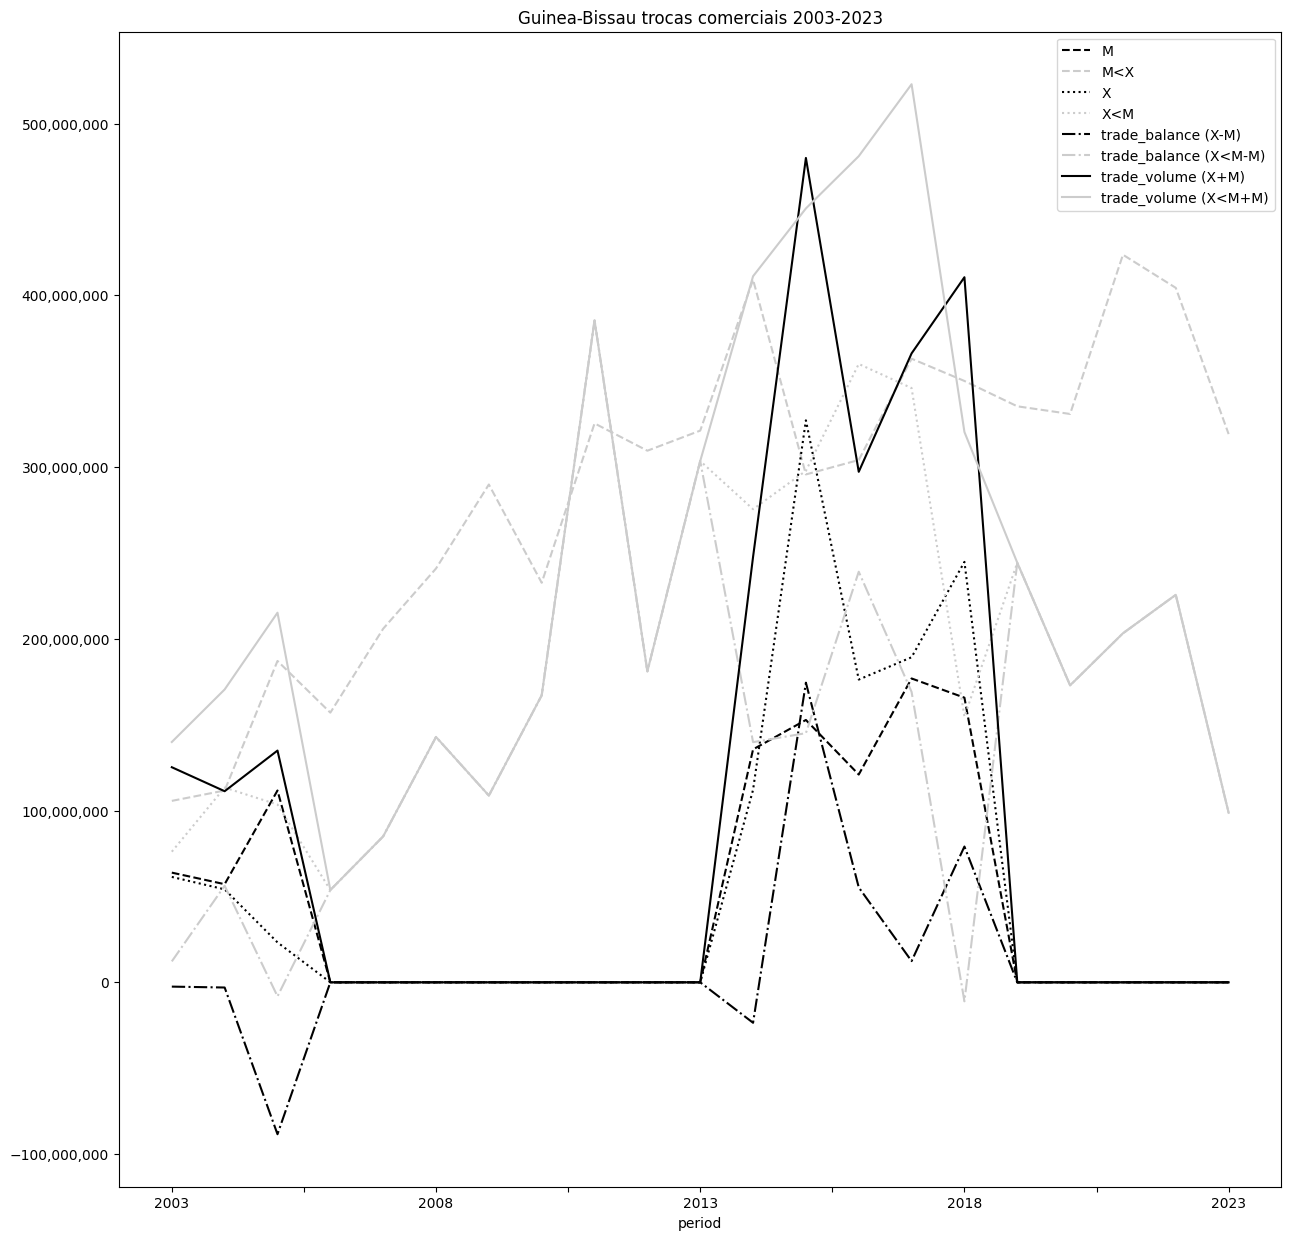

In [30]:
import logging

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
logging.basicConfig(level=logging.ERROR)

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [31]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

In [32]:

df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                period_size=1,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True
                                )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
INFO:root:Calling getFinalData for peri

Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [33]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','cmdCode','partner_sum','partner_perc','partner_upper_sum']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Guinea-Bissau in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Panama' 'Portugal' 'Senegal' 'India' 'Singapore' 'Montserrat' 'Spain'
 'Netherlands' 'China, Hong Kong SAR' 'Viet Nam' 'United Arab Emirates'
 'China' 'Ghana']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,cmdCode,partner_sum,partner_perc,partner_upper_sum
8,2003,X,Guinea-Bissau,1,Singapore,TOTAL,"$30,917,869",50.382%,"$61,366,793"
7,2003,X,Guinea-Bissau,2,India,TOTAL,"$24,764,478",40.355%,"$61,366,793"
5,2003,X,Guinea-Bissau,3,Portugal,TOTAL,"$1,636,878",2.667%,"$61,366,793"
4,2003,X,Guinea-Bissau,4,Panama,TOTAL,"$1,326,105",2.161%,"$61,366,793"
6,2003,X,Guinea-Bissau,5,Senegal,TOTAL,"$1,138,030",1.854%,"$61,366,793"
23,2004,X,Guinea-Bissau,1,India,TOTAL,"$45,593,503",84.238%,"$54,124,875"
24,2004,X,Guinea-Bissau,2,Singapore,TOTAL,"$6,923,355",12.791%,"$54,124,875"
22,2004,X,Guinea-Bissau,3,Senegal,TOTAL,"$696,783",1.287%,"$54,124,875"
16,2004,X,Guinea-Bissau,4,Montserrat,TOTAL,"$578,206",1.068%,"$54,124,875"
25,2004,X,Guinea-Bissau,5,Spain,TOTAL,"$86,400",0.160%,"$54,124,875"


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [34]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)


Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [35]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns].fillna(0)

partner_perc                                              \
partnerDesc             China China, Hong Kong SAR Ghana India Montserrat   
refYear flowDesc                                                            
2003    Export           0.02                 0.00  0.00  0.40       0.00   
2004    Export           0.00                 0.00  0.00  0.84       0.01   
2005    Export           0.00                 0.00  0.00  0.87       0.00   
2014    Export           0.02                 0.02  0.00  0.73       0.00   
2015    Export           0.14                 0.00  0.00  0.52       0.00   
2016    Export           0.01                 0.00  0.02  0.78       0.00   
2017    Export           0.00                 0.00  0.00  0.59       0.00   
2018    Export           0.29                 0.00  0.00  0.44       0.00   

                                                                ...  \
partnerDesc      Netherlands Panama Portugal Senegal Singapore  ...   
refYear flowDesc                                                ...   
2003    Export          0.00   0.02     0.03    0.02      0.50  ...   
2004    Export          0.00   0.00     0.00    0.01      0.13  ...   
2005    Export          0.00   0.00     0.01    0.00      0.12  ...   
2014    Export          0.00   0.00     0.02    0.00      0.09  ...   
2015    Export          0.00   0.00     0.00    0.00      0.15  ...   
2016    Export          0.00   0.00     0.00    0.00      0.12  ...   
2017    Export          0.00   0.00     0.00    0.00      0.19  ...   
2018    Export          0.01   0.00     0.00    0.00      0.18  ...   

                   primaryValue                                       \
partnerDesc               India Montserrat  Netherlands       Panama   
refYear flowDesc                                                       
2003    Export    24,764,478.00       0.00         0.00 1,326,105.00   
2004    Export    45,593,503.00 578,206.00    73,215.00    17,989.00   
2005    Export    20,134,580.00       0.00    58,233.00    49,769.00   
2014    Export    81,585,448.22       0.00    33,639.63         0.00   
2015    Export   171,641,622.40       0.00         0.00         0.00   
2016    Export   137,829,228.84       0.00         0.00         0.00   
2017    Export   111,887,163.66       0.00   692,300.00         0.00   
2018    Export   108,133,991.55       0.00 1,500,000.00         0.00   

                                                                     \
partnerDesc          Portugal      Senegal     Singapore      Spain   
refYear flowDesc                                                      
2003    Export   1,636,878.00 1,138,030.00 30,917,869.00 201,021.00   
2004    Export      51,216.00   696,783.00  6,923,355.00  86,400.00   
2005    Export     121,206.00     4,421.00  2,812,782.00       0.00   
2014    Export   1,706,998.48         0.00 10,129,980.28       0.00   
2015    Export       7,056.11    42,740.64 48,104,702.40       0.00   
2016    Export           0.00         0.00 21,088,045.75       0.00   
2017    Export      89,700.00         0.00 35,386,742.50       0.00   
2018    Export           0.00         0.00 43,691,092.90       0.00   

                                                     
partnerDesc      United Arab Emirates      Viet Nam  
refYear flowDesc                                     
2003    Export                   0.00          0.00  
2004    Export                   0.00          0.00  
2005    Export                   0.00          0.00  
2014    Export           9,942,848.88  5,030,758.81  
2015    Export          35,762,400.00 23,827,732.00  
2016    Export           5,707,069.00  7,416,047.75  
2017    Export           2,155,087.00 37,214,846.55  
2018    Export           4,173,488.00 15,015,017.75  

[8 rows x 26 columns]

Make a table with the total value of exports for top partners in the period of interest

In [36]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['Panama' 'Portugal' 'Senegal' 'India' 'Singapore' 'Montserrat' 'Spain'
 'Netherlands' 'China, Hong Kong SAR' 'Viet Nam' 'United Arab Emirates'
 'China' 'Ghana']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [37]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,India,Singapore,China,Viet Nam,United Arab Emirates,Ghana,"China, Hong Kong SAR",Portugal,Montserrat,Netherlands,Senegal,Panama,Spain
refYear,,,,,,,,,,,,,
2003,"24,764,478.00","30,917,869.00","988,631.00",NaN,NaN,NaN,NaN,"1,636,878.00",NaN,NaN,"1,138,030.00","1,326,105.00","201,021.00"
2004,"45,593,503.00","6,923,355.00",NaN,NaN,NaN,NaN,NaN,"51,216.00","578,206.00","73,215.00","696,783.00","17,989.00","86,400.00"
2005,"20,134,580.00","2,812,782.00",NaN,NaN,NaN,NaN,NaN,"121,206.00",NaN,"58,233.00","4,421.00","49,769.00",NaN
2014,"81,585,448.22","10,129,980.28","1,733,252.83","5,030,758.81","9,942,848.88",NaN,"1,910,910.46","1,706,998.48",NaN,"33,639.63",NaN,NaN,NaN
2015,"171,641,622.40","48,104,702.40","47,102,428.36","23,827,732.00","35,762,400.00",NaN,"540,000.00","7,056.11",NaN,NaN,"42,740.64",NaN,NaN
2016,"137,829,228.84","21,088,045.75","1,223,114.63","7,416,047.75","5,707,069.00","3,000,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,"111,887,163.66","35,386,742.50","575,000.00","37,214,846.55","2,155,087.00","402,500.00","632,500.00","89,700.00",NaN,"692,300.00",NaN,NaN,NaN
2018,"108,133,991.55","43,691,092.90","71,324,917.91","15,015,017.75","4,173,488.00",NaN,"960,250.00",NaN,NaN,"1,500,000.00",NaN,NaN,NaN


Plot saved to  reports/Guinea-Bissau_2.1.4_export_2003-2023_direct.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA
6 Line2D(_child12) #BBBBBB
7 Line2D(_child14) #CCCCCC
8 Line2D(_child16) #555555
9 Line2D(_child18) #666666
10 Line2D(_child20) #777777
11 Line2D(_child22) #888888
12 Line2D(_child24) #999999


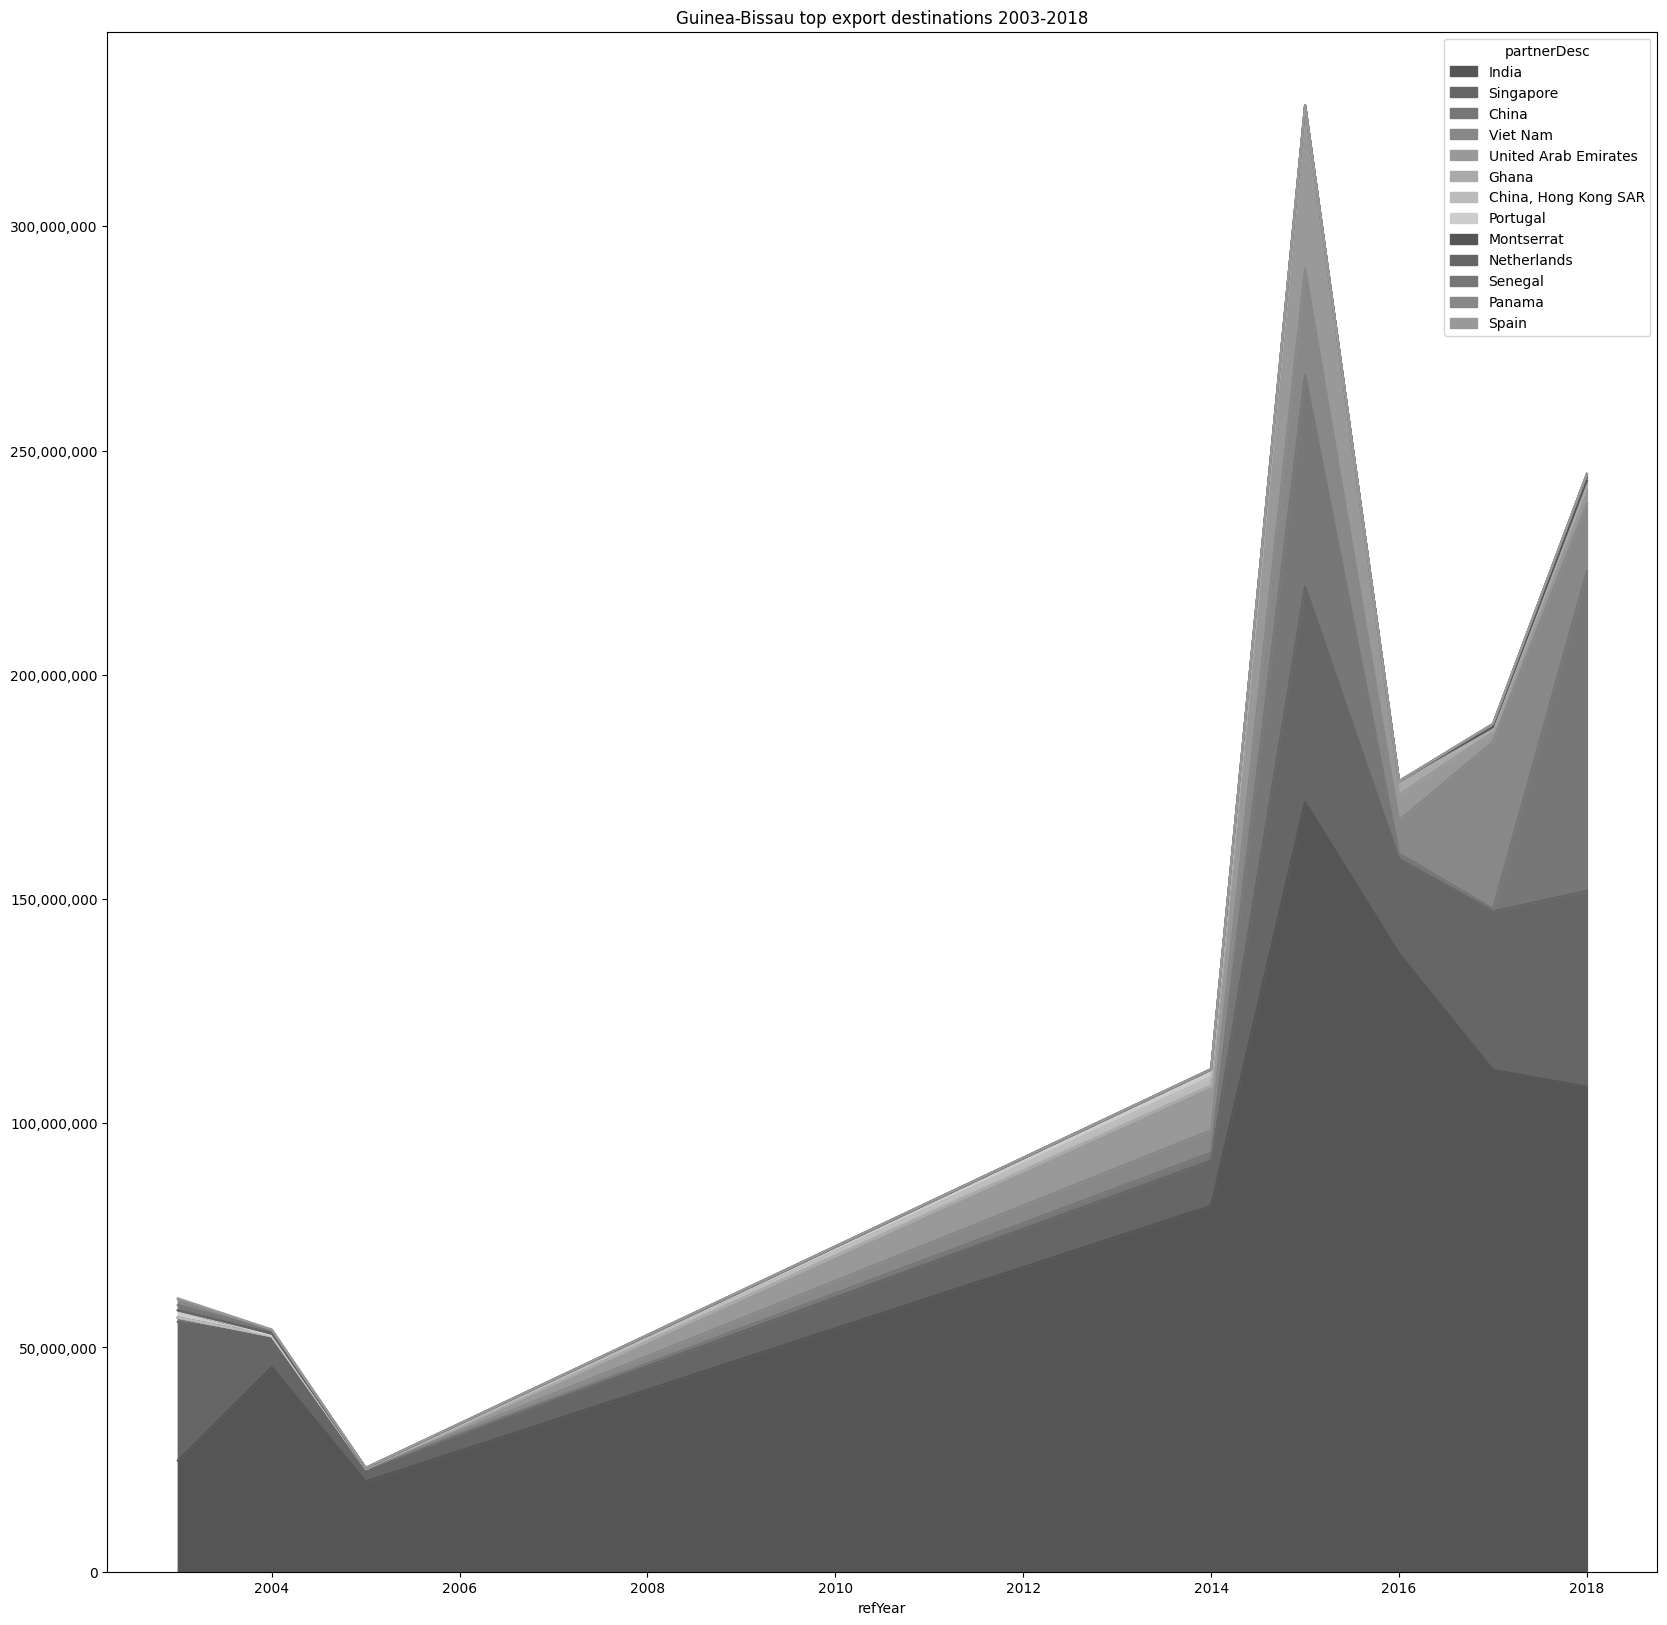

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_{start_year}-{end_year}_{filename_symmetric_flag}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

#### Export to Excel

Table with the top export destinations for the period of interest

In [39]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners_{filename_symmetric_flag}.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols_{filename_symmetric_flag}.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}_{filename_symmetric_flag}.xlsx'

exports[cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Guinea-Bissau_2.1.1_top_export_partners_direct.xlsx
Top partners cols file: reports/Guinea-Bissau_2.1.2_top_export_partners_cols_direct.xlsx
Export top partners file: reports/Guinea-Bissau_2.1.3_export_top_5_partners_2003-2018_direct.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [40]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5

print(country_of_interest_name, years_of_interest)

Guinea-Bissau 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [41]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # use mode from previous cells

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'direct'

In [42]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True

                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
INFO:root:Calling getFinalData for peri

In [43]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2014, 2015, 2016, 2017, 2018]


In [44]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,X,...,"932,956.00",False,NaN,False,None,"453,785.00","453,785.00",0,False,False
1,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,X,...,"5,110.00",False,NaN,False,None,"1,897.00","1,897.00",0,False,False
2,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,X,...,"1,940.00",False,NaN,False,None,968.00,968.00,0,False,False
3,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,X,...,830.00,False,NaN,False,None,208.00,208.00,0,False,False
4,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,X,...,470.00,False,NaN,False,None,229.00,229.00,0,False,False


Agreggate by product, keep the top products exported each year

In [45]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 430
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  29 non-null     object 
 1   freqCode                  29 non-null     object 
 2   refPeriodId               29 non-null     int64  
 3   refYear                   29 non-null     int64  
 4   refMonth                  29 non-null     int64  
 5   period                    29 non-null     object 
 6   reporterCode              29 non-null     int64  
 7   reporterISO               29 non-null     object 
 8   reporterDesc              29 non-null     object 
 9   flowCode                  29 non-null     object 
 10  flowDesc                  29 non-null     object 
 11  partnerCode               29 non-null     int64  
 12  partnerISO                29 non-null     object 
 13  partnerDesc               29 non-null     object 
 14  partner2Code    

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,product_upper_sum
31,2003,X,1,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried","$116,631,992",95.029%,"$122,733,584"
15,2003,X,2,842649,"Cranes; self-propelled derricks and cranes, not on tyres, n.e.s. in heading no. 8426","$2,063,770",1.682%,"$122,733,584"
0,2003,X,3,140420,Vegetable products; cotton linters,"$907,570",0.739%,"$122,733,584"
18,2003,X,4,844190,"Machinery; parts of machinery for making up paper pulp, paper or paperboard, including cutting machines of all kinds","$687,906",0.560%,"$122,733,584"
17,2003,X,5,844180,"Machinery; n.e.s. in heading no. 8441, for making up paper pulp, paper or paperboard","$613,556",0.500%,"$122,733,584"
150,2004,X,1,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried","$106,142,710",98.054%,"$108,249,749"
137,2004,X,2,271000,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals","$876,706",0.810%,"$108,249,749"
173,2004,X,3,100640,"Cereals; rice, broken","$282,908",0.261%,"$108,249,749"
203,2004,X,4,170191,"Sucrose; chemically pure, containing added flavouring or colouring matter, in solid form","$145,944",0.135%,"$108,249,749"
199,2004,X,5,140420,Vegetable products; cotton linters,"$112,264",0.104%,"$108,249,749"


#### Export to Excel

In [46]:
filename = f'reports/{country_of_interest_name}_2.2_exports_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
exports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Guinea-Bissau_2.2_exports_HS-AG6-2003-2018_direct.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [47]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # we keep the previous choice

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'direct'

#### Caveat

Simmetrical reporting can vary greatly from direct reporting.

Example:

Mozambique exports to Netherlands in 2008

#### Analyse assymetric reporting (optional)

Choose pair of countries and a year to compare exports with partner imports

Example: Mozambique exports to Netherlands in 2008 and Netherlands imports from Mozambique in 2008

Netherlands does not reports a 1,451,846,140.00	USD export of Aluminium and articles thereof that Mozambique declares.

Note that World Bank used Mozambique export data as reported by Mozambique:

https://wits.worldbank.org/CountryProfile/en/Country/MOZ/Year/2008/Summarytext

In [48]:
import comtradetools

analyse_symmetric = False  # if true a symmetry analysis is done, sey the variables bellow

reporterA = country_of_interest
partner = 'Portugal'
year_of_reference = "2012"



##### Compare declared exports with declared imports of partner

In [49]:
import comtradetools
import pandas as pd

partnerA = comtradetools.encode_country(partner)

if analyse_symmetric:
    clCode = 'HS'
    cmdDetail = 'AG2'  # not all countries report at higher detail

    cols = ['refYear','reporterDesc', 'flowCode','partnerDesc','cmdCode','cmdDesc','primaryValue']
    declared_exports = comtradetools.getFinalData(   # exports as declare by reporter
                            APIKEY,
                            reporterCode=reporterA,
                            typeCode='C',  # commodities
                            freqCode='A',  # annual
                            flowCode='X',
                            period=year_of_reference,
                            partnerCode=partnerA,
                            remove_world=True,
                            partner2Code=0,
                            clCode=clCode,
                            cmdCode=cmdDetail,
                            motCode=0,  # all means of transport
                            customsCode='C00',
                            includeDesc=True,
                            cache=True
                            )
    declared_exports = declared_exports[cols].sort_values('cmdCode')
    partner_imports = comtradetools.getFinalData(   # exports as declared by partner as imports
                        APIKEY,
                        reporterCode=partnerA,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode='M',
                        period=year_of_reference,
                        partnerCode=reporterA,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True)
    partner_imports = partner_imports[cols].sort_values('cmdCode')
    compared_data = pd.merge(declared_exports[cols], partner_imports[cols], on='cmdCode', how='outer').fillna(0, inplace=False)
    filename = f"reports/{country_of_interest_name}_2.1.5_export_import_symmetry_{partner}_{year_of_reference}.xlsx"
    compared_data.to_excel(filename, index=False)
    print("Symmetry analysis exported to ",filename)
else:
    compared_data = 'Symmetry analysis not done'

compared_data

'Symmetry analysis not done'

Analyse partners

In [50]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [51]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
334,2015,X,Guinea-Bissau,Portugal,17.00,170191,"Sucrose; chemically pure, containing added fla..."
137,2004,X,Guinea-Bissau,France,"29,083.00",271000,Oils; petroleum oils and oils obtained from bi...
266,2005,X,Guinea-Bissau,Portugal,247.00,151190,"Vegetable oils; palm oil and its fractions, ot..."
25,2003,X,Guinea-Bissau,Cabo Verde,258.00,081340,"Fruit, edible; fruit n.e.s. in heading no. 081..."
421,2018,X,Guinea-Bissau,China,"2,499,111.00",080131,"Nuts, edible; cashew nuts, fresh or dried, in ..."
33,2003,X,Guinea-Bissau,Italy,"175,801.00",843143,Boring or sinking machinery; parts of the mach...
77,2003,X,Guinea-Bissau,Singapore,"30,917,869.00",080131,"Nuts, edible; cashew nuts, in shell, fresh or ..."
415,2018,X,Guinea-Bissau,China,"12,175,481.25",440799,"Wood; sawn or chipped lengthwise, sliced or pe..."
170,2004,X,Guinea-Bissau,Russian Federation,"5,995.00",271000,Oils; petroleum oils and oils obtained from bi...
338,2015,X,Guinea-Bissau,Senegal,"42,740.64",440710,"Wood, coniferous; sawn or chipped lengthwise, ..."


In [52]:
df.refYear.unique()

array([2003, 2004, 2005, 2014, 2015, 2016, 2017, 2018])

Aggregate by partner and keep the main ones

In [53]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear',f'{reporter_column}Desc','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Guinea-Bissau in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['140420' '842649' '844180' '844190' '080131' '271000' '100640' '170191'
 '999999' '720410' '200820' '440399' '440710' '440791' '440792' '080132'
 '440799' '440729']
   140420: Vegetable products; cotton linters
   842649: Cranes; self-propelled derricks and cranes, not on tyres, n.e.c. in heading no. 8426
   844180: Machinery; n.e.c. in heading no. 8441, for making up paper pulp, paper or paperboard
   844190: Machinery; parts of machinery for making up paper pulp, paper or paperboard, including cutting machines of all kinds
   080131: Nuts, edible; cashew nuts, fresh or dried, in shell
   271000: 271000
   100640: Cereals; rice, broken
   170191: Sugars; sucrose, chemically pure, in solid form, containing added flavouring or colouring matter
   999999: Commodities not specified according to kind
   720410: Ferrous waste and scrap; of cas

#### Show partners for main export products

In [54]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,reporterDesc,flowCode,cmdCode,cmdDesc,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
77,2003,Guinea-Bissau,X,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",Singapore,1,"$30,917,869",53.018%,"$58,315,996"
76,2003,Guinea-Bissau,X,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",India,2,"$24,764,478",42.466%,"$58,315,996"
35,2003,Guinea-Bissau,X,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",Panama,3,"$1,326,105",2.274%,"$58,315,996"
31,2003,Guinea-Bissau,X,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",China,4,"$988,631",1.695%,"$58,315,996"
43,2003,Guinea-Bissau,X,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",Portugal,5,"$318,913",0.547%,"$58,315,996"
73,2003,Guinea-Bissau,X,842649,"Cranes; self-propelled derricks and cranes, not on tyres, n.e.s. in heading no. 8426",Senegal,1,"$1,031,885",100.000%,"$1,031,885"
55,2003,Guinea-Bissau,X,140420,Vegetable products; cotton linters,Portugal,1,"$453,785",100.000%,"$453,785"
66,2003,Guinea-Bissau,X,844190,"Machinery; parts of machinery for making up paper pulp, paper or paperboard, including cutting machines of all kinds",Portugal,1,"$343,953",100.000%,"$343,953"
82,2003,Guinea-Bissau,X,844180,"Machinery; n.e.s. in heading no. 8441, for making up paper pulp, paper or paperboard",Spain,1,"$201,021",65.527%,"$306,778"
34,2003,Guinea-Bissau,X,844180,"Machinery; n.e.s. in heading no. 8441, for making up paper pulp, paper or paperboard",Italy,2,"$105,757",34.473%,"$306,778"


#### Export to Excel

In [55]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}_{filename_symmetric_flag}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Guinea-Bissau_2.3_exports_products_partners_HS-AG6-2003-2018_direct.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [56]:
top_export_partners

array(['Panama', 'Portugal', 'Senegal', 'India', 'Singapore',
       'Montserrat', 'Spain', 'Netherlands', 'China, Hong Kong SAR',
       'Viet Nam', 'United Arab Emirates', 'China', 'Ghana'], dtype=object)

In [57]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear',f'{reporter_column}Desc','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (13): ['Panama' 'Portugal' 'Senegal' 'India' 'Singapore' 'Montserrat' 'Spain'
 'Netherlands' 'China, Hong Kong SAR' 'Viet Nam' 'United Arab Emirates'
 'China' 'Ghana']
First rows


refYear,reporterDesc,flowCode,partnerDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,Guinea-Bissau,X,Singapore,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,"$30,917,869",100.000%,"$30,917,869"
2003,Guinea-Bissau,X,India,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,"$24,764,478",100.000%,"$24,764,478"
2003,Guinea-Bissau,X,Portugal,140420,Vegetable products; cotton linters,1,"$453,785",27.723%,"$1,636,876"
2003,Guinea-Bissau,X,Portugal,844190,"Machinery; parts of machinery for making up paper pulp, paper or paperboard, including cutting machines of all kinds",2,"$343,953",21.013%,"$1,636,876"
2003,Guinea-Bissau,X,Portugal,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",3,"$318,913",19.483%,"$1,636,876"
2003,Guinea-Bissau,X,Portugal,440399,"Wood; in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated, n.e.s. in heading no. 4403",4,"$197,231",12.049%,"$1,636,876"
2003,Guinea-Bissau,X,Portugal,200819,"Nuts and other seeds; whether or not containing added sugar, other sweetening matter or spirit (excluding ground-nuts except in mixtures)",5,"$187,450",11.452%,"$1,636,876"
2003,Guinea-Bissau,X,Panama,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,"$1,326,105",100.000%,"$1,326,105"
2003,Guinea-Bissau,X,Senegal,842649,"Cranes; self-propelled derricks and cranes, not on tyres, n.e.s. in heading no. 8426",1,"$1,031,885",90.673%,"$1,138,031"
2003,Guinea-Bissau,X,Senegal,848490,"Gasket sets or assortments of gaskets and similar joints; dissimilar in composition, put up in pouches, envelopes or similar packings",2,"$70,117",6.161%,"$1,138,031"


Last rows

In [58]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,reporterDesc,flowCode,partnerDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2018,Guinea-Bissau,X,China,440799,"Wood; sawn or chipped lengthwise, sliced or peeled, of a thickness exceeding 6mm, whether or not planed, sanded or finger-jointed, n.e.c. in heading no. 4407",2,"$12,175,481",17.070%,"$71,324,918"
2018,Guinea-Bissau,X,China,080131,"Nuts, edible; cashew nuts, fresh or dried, in shell",3,"$2,499,111",3.504%,"$71,324,918"
2018,Guinea-Bissau,X,China,440791,"Wood; oak (Quercus spp.), sawn or chipped lengthwise, sliced or peeled, whether or not planed, sanded or end-jointed, thicker than 6mm",4,"$1,807,791",2.535%,"$71,324,918"
2018,Guinea-Bissau,X,China,440729,"Wood, tropical, n.e.c. in item no. 4407.2, sawn or chipped lengthwise, sliced or peeled, whether or not planed, sanded or end-jointed, of a thickness exceeding 6mm",5,"$100,181",0.140%,"$71,324,918"
2018,Guinea-Bissau,X,Singapore,080131,"Nuts, edible; cashew nuts, fresh or dried, in shell",1,"$43,691,093",100.000%,"$43,691,093"
2018,Guinea-Bissau,X,Viet Nam,080131,"Nuts, edible; cashew nuts, fresh or dried, in shell",1,"$14,864,774",98.999%,"$15,015,018"
2018,Guinea-Bissau,X,Viet Nam,999999,Commodities not specified according to kind,2,"$150,244",1.001%,"$15,015,018"
2018,Guinea-Bissau,X,United Arab Emirates,080131,"Nuts, edible; cashew nuts, fresh or dried, in shell",1,"$4,173,488",100.000%,"$4,173,488"
2018,Guinea-Bissau,X,Netherlands,080131,"Nuts, edible; cashew nuts, fresh or dried, in shell",1,"$1,500,000",100.000%,"$1,500,000"
2018,Guinea-Bissau,X,"China, Hong Kong SAR",080131,"Nuts, edible; cashew nuts, fresh or dried, in shell",1,"$960,250",100.000%,"$960,250"


In [59]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}_{filename_symmetric_flag}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False])[cols].to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Guinea-Bissau_2.4_exports_partners_products_HS-AG6-2003-2018_direct.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [60]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

40

In [61]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [62]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

INFO:root:Calling getFinalData for period 2003


Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  704,288,620,686,591,528,784,724,500,344,699,156,702
cmdCodeCSV:  440791,170191,440792,440710,080131,200820,440729,720410,440799,440399,271000,844190,842649,140420,080132,100640,844180,999999


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50703), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2004
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50710), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/comtradetools.py:658: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no l

Alternative, concatenating

In [63]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=1,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [64]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['China',
  'Ghana',
  'China, Hong Kong SAR',
  'Senegal',
  'Portugal',
  'Netherlands',
  'Panama',
  'Montserrat',
  'Singapore',
  'India',
  'Viet Nam',
  'Spain',
  'United Arab Emirates'],
 ['Czechia',
  'Türkiye',
  'Norway',
  'Viet Nam',
  'South Africa',
  'Philippines',
  'Finland',
  'Brazil',
  'Denmark',
  'Austria',
  'Sweden',
  'India',
  'Indonesia',
  'Spain',
  'Belgium',
  'Switzerland',
  'Malaysia',
  'Netherlands',
  'Thailand',
  'Canada',
  'Australia',
  'Singapore',
  'Italy',
  'United Kingdom',
  'France',
  'China, Hong Kong SAR',
  'Germany',
  'Rep. of Korea',
  'Other Asia, nes',
  'USA',
  'Japan',
  'Ireland',
  'Belarus',
  'Greece',
  'Iran',
  'Israel',
  'New Zealand',
  'Russian Federation',
  'Ukraine',
  'China',
  'Portugal',
  'Tunisia',
  'United Arab Emirates',
  'Argentina',
  'Bolivia (Plurinational State of)',
  'Bosnia Herzegovina',
  'Solomon Isds',
  'Bulgaria',
  'Myanmar',
  'Cambodia',
  'Cameroon',
  'Central African Rep.',
  

For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [65]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
China,M,2003,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Viet Nam,"$49,640",95.169%,"$52,160"
China,M,2003,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Indonesia,"$2,290",4.390%,"$52,160"
China,M,2003,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",3,Iran,$230,0.441%,"$52,160"
China,M,2004,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Viet Nam,"$13,151",100.000%,"$13,151"
China,M,2005,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Nigeria,"$33,469",76.364%,"$43,828"
China,M,2005,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Viet Nam,"$5,545",12.652%,"$43,828"
China,M,2005,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",3,Indonesia,"$4,814",10.984%,"$43,828"
China,M,2006,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Togo,"$62,681",100.000%,"$62,681"
China,M,2007,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Guinea-Bissau,"$134,552",59.883%,"$224,690"
China,M,2007,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Côte d'Ivoire,"$75,119",33.432%,"$224,690"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [66]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
China,M,2007,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Guinea-Bissau,"$134,552",59.883%,"$224,690"
China,M,2012,440729,"Wood, tropical; as specified in Subheading Note 2 to this Chapter, n.e.c. in item no. 4407.2, sawn or chipped lengthwise, sliced or peeled, whether or not planed, sanded or end-jointed, thicker than 6mm",20,Guinea-Bissau,"$432,560",0.233%,"$185,850,214"
India,M,2003,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",1,Guinea-Bissau,"$50,911,450",17.945%,"$283,701,199"
India,M,2004,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Guinea-Bissau,"$69,440,776",18.318%,"$379,085,772"
India,M,2005,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Guinea-Bissau,"$92,385,351",19.493%,"$473,943,500"
India,M,2006,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",4,Guinea-Bissau,"$43,932,970",10.918%,"$402,404,316"
India,M,2007,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Guinea-Bissau,"$71,495,662",19.396%,"$368,611,199"
India,M,2008,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",2,Guinea-Bissau,"$102,688,287",15.962%,"$643,339,099"
India,M,2009,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",3,Guinea-Bissau,"$85,492,718",15.867%,"$538,792,647"
India,M,2010,080131,"Nuts, edible; cashew nuts, in shell, fresh or dried",4,Guinea-Bissau,"$59,628,450",10.393%,"$573,762,191"


In [67]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Guinea-Bissau_2.5.1_export_partners_alternative_direct.xlsx


In [68]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Guinea-Bissau_2.5.2_export_partners_alternative_relevant_direct.xlsx


## 3. Imports

In [69]:
print(country_of_interest_name, years_of_interest)

Guinea-Bissau 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [70]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = False  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [71]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50786), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2004
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50787), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2005
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.p

Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [72]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
partner_column = 'partner'
reporter_column = 'reporter'

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Guinea-Bissau in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['China' 'Italy' 'Portugal' 'Senegal' 'Thailand' 'Netherlands' 'France'
 'Denmark' 'Pakistan' 'India']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,partner_sum,partner_perc,partner_upper_perc
23,2003,M,Guinea-Bissau,1,Portugal,"$23,924,710",37.460%,37.460%
6,2003,M,Guinea-Bissau,2,China,"$12,291,236",19.245%,19.245%
26,2003,M,Guinea-Bissau,3,Senegal,"$8,205,814",12.848%,12.848%
31,2003,M,Guinea-Bissau,4,Thailand,"$3,274,479",5.127%,5.127%
14,2003,M,Guinea-Bissau,5,Italy,"$2,682,503",4.200%,4.200%
51,2004,M,Guinea-Bissau,1,Portugal,"$27,238,817",47.665%,47.665%
53,2004,M,Guinea-Bissau,2,Senegal,"$17,170,908",30.047%,30.047%
38,2004,M,Guinea-Bissau,3,China,"$5,818,599",10.182%,10.182%
50,2004,M,Guinea-Bissau,4,Netherlands,"$2,650,091",4.637%,4.637%
56,2004,M,Guinea-Bissau,5,Thailand,"$1,873,266",3.278%,3.278%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [73]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                              \
partnerDesc           Albania Andorra Angola Anguilla Antigua and Barbuda   
refYear flowDesc                                                            
2003    Import           0.00    0.00   0.00     0.00                0.02   
2004    Import           0.00    0.00   0.00     0.00                0.00   
2005    Import           0.00    0.00   0.00     0.00                0.00   
2014    Import           0.00    0.00   0.00     0.00                0.00   
2015    Import           0.00    0.00   0.00     0.00                0.00   
2016    Import           0.00    0.00   0.00     0.00                0.00   
2017    Import           0.00    0.00   0.00     0.00                0.00   
2018    Import           0.00    0.00   0.00     0.00                0.00   

                                                                    ...  \
partnerDesc      Areas, nes Argentina Australia Austria Bangladesh  ...   
refYear flowDesc                                                    ...   
2003    Import         0.00      0.00      0.01    0.00       0.00  ...   
2004    Import         0.00      0.00      0.00    0.00       0.00  ...   
2005    Import         0.00      0.00      0.00    0.00       0.00  ...   
2014    Import         0.00      0.00      0.00    0.01       0.00  ...   
2015    Import         0.00      0.00      0.00    0.01       0.00  ...   
2016    Import         0.00      0.00      0.00    0.01       0.00  ...   
2017    Import         0.00      0.00      0.00    0.00       0.00  ...   
2018    Import         0.00      0.00      0.00    0.00       0.00  ...   

                 primaryValue                                            \
partnerDesc           Türkiye        USA   Ukraine United Arab Emirates   
refYear flowDesc                                                          
2003    Import           0.00  35,414.00      0.00                 0.00   
2004    Import           0.00   1,548.00      0.00                 0.00   
2005    Import           0.00       0.00      0.00                 0.00   
2014    Import   1,657,312.81 100,546.52      0.00           376,220.04   
2015    Import   1,571,491.89 263,417.29      0.00         5,397,790.39   
2016    Import   1,317,155.58 126,513.86      0.00           768,956.63   
2017    Import     928,247.65 330,391.12      0.00         1,002,800.11   
2018    Import   2,829,151.09 386,564.96 14,240.00           657,628.19   

                                                                      \
partnerDesc      United Kingdom United States Minor Outlying Islands   
refYear flowDesc                                                       
2003    Import         3,140.00                                 0.00   
2004    Import        59,464.00                                 0.00   
2005    Import        45,413.00                                 0.00   
2014    Import       107,939.51                                 0.00   
2015    Import       249,386.14                                 0.00   
2016    Import       110,972.98                             1,901.90   
2017    Import       872,247.20                                 0.00   
2018    Import       458,662.29                                 0.00   

                                                                
partnerDesc           Uruguay Venezuela     Viet Nam  Zimbabwe  
refYear flowDesc                                                
2003    Import           0.00      0.00 2,487,278.00      0.00  
2004    Import           0.00      0.00         0.00      0.00  
2005    Import           0.00      0.00         0.00      0.00  
2014    Import     942,528.74      0.00   748,779.26      0.00  
2015    Import   1,791,464.00      0.00 1,567,918.58 14,977.96  
2016    Import     831,276.23  2,658.95         0.00  3,536.09  
2017    Import     464,884.69      0.00    75,757.91      0.00  
2018    Import     518,173.20  9,300.00     9,142.57      0.00  

[8 rows 

Limit table to top import partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [74]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                                                  \
partnerDesc             China Denmark France India Italy Netherlands Pakistan   
refYear flowDesc                                                                
2003    Import           0.19    0.00   0.00  0.00  0.04        0.00     0.00   
2004    Import           0.10    0.00   0.00  0.00  0.00        0.05     0.00   
2005    Import           0.02    0.00   0.03  0.00  0.00        0.06     0.00   
2014    Import           0.03    0.06   0.02  0.08  0.02        0.05     0.06   
2015    Import           0.02    0.00   0.01  0.09  0.01        0.04     0.10   
2016    Import           0.04    0.00   0.01  0.04  0.03        0.06     0.12   
2017    Import           0.06    0.01   0.01  0.05  0.01        0.05     0.12   
2018    Import           0.06    0.01   0.01  0.04  0.01        0.05     0.09   

                                            primaryValue               \
partnerDesc      Portugal Senegal Thailand         China      Denmark   
refYear flowDesc                                                        
2003    Import       0.37    0.13     0.05 12,291,236.00    77,651.00   
2004    Import       0.48    0.30     0.03  5,818,599.00     9,716.00   
2005    Import       0.37    0.41     0.07  2,665,848.00         0.00   
2014    Import       0.32    0.17     0.01  3,455,963.30 7,734,795.89   
2015    Import       0.32    0.13     0.01  3,053,563.58   719,858.96   
2016    Import       0.42    0.11     0.00  4,333,857.78   487,482.91   
2017    Import       0.40    0.13     0.00 10,957,370.59 1,667,484.86   
2018    Import       0.38    0.17     0.00  9,319,925.13 1,557,592.81   

                                                                       \
partnerDesc            France         India        Italy  Netherlands   
refYear flowDesc                                                        
2003    Import     179,623.00      7,938.00 2,682,503.00   286,195.00   
2004    Import     265,929.00     26,419.00    11,686.00 2,650,091.00   
2005    Import   3,613,920.00     38,505.00    48,643.00 6,671,598.00   
2014    Import   3,051,340.34 10,609,708.74 3,013,938.11 6,901,650.29   
2015    Import   1,592,343.12 13,876,327.09 2,227,824.71 6,858,239.59   
2016    Import   1,684,461.08  4,453,640.38 3,310,287.95 7,831,228.54   
2017    Import   1,292,926.96  9,309,003.45 2,225,744.72 8,810,727.85   
2018    Import   1,768,673.29  7,222,288.38 2,246,191.29 8,736,296.08   

                                                                         
partnerDesc           Pakistan      Portugal       Senegal     Thailand  
refYear flowDesc                                                         
2003    Import            0.00 23,924,710.00  8,205,814.00 3,274,479.00  
2004    Import            0.00 27,238,817.00 17,170,908.00 1,873,266.00  
2005    Import            0.00 41,559,000.00 45,723,375.00 7,798,237.00  
2014    Import    8,486,610.10 44,006,042.61 22,506,779.07 1,021,226.01  
2015    Import   15,622,412.18 49,015,605.44 19,857,638.36 1,487,951.35  
2016    Import   14,011,397.54 50,436,487.64 13,324,133.02   442,115.57  
2017    Import   21,196,984.17 70,323,482.92 23,165,704.65   571,552.74  
2018    Import   14,454,682.51 63,435,140.70 28,352,602.90   641,746.03

Make a table with the total value of import from top partners in the period of interest

In [75]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['China' 'Italy' 'Portugal' 'Senegal' 'Thailand' 'Netherlands' 'France'
 'Denmark' 'Pakistan' 'India']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [76]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,Portugal,Senegal,Pakistan,China,Netherlands,India,Thailand,Italy,France,Denmark
refYear,,,,,,,,,,
2003,"23,924,710.00","8,205,814.00",0.00,"12,291,236.00","286,195.00","7,938.00","3,274,479.00","2,682,503.00","179,623.00","77,651.00"
2004,"27,238,817.00","17,170,908.00",0.00,"5,818,599.00","2,650,091.00","26,419.00","1,873,266.00","11,686.00","265,929.00","9,716.00"
2005,"41,559,000.00","45,723,375.00",0.00,"2,665,848.00","6,671,598.00","38,505.00","7,798,237.00","48,643.00","3,613,920.00",0.00
2014,"44,006,042.61","22,506,779.07","8,486,610.10","3,455,963.30","6,901,650.29","10,609,708.74","1,021,226.01","3,013,938.11","3,051,340.34","7,734,795.89"
2015,"49,015,605.44","19,857,638.36","15,622,412.18","3,053,563.58","6,858,239.59","13,876,327.09","1,487,951.35","2,227,824.71","1,592,343.12","719,858.96"
2016,"50,436,487.64","13,324,133.02","14,011,397.54","4,333,857.78","7,831,228.54","4,453,640.38","442,115.57","3,310,287.95","1,684,461.08","487,482.91"
2017,"70,323,482.92","23,165,704.65","21,196,984.17","10,957,370.59","8,810,727.85","9,309,003.45","571,552.74","2,225,744.72","1,292,926.96","1,667,484.86"
2018,"63,435,140.70","28,352,602.90","14,454,682.51","9,319,925.13","8,736,296.08","7,222,288.38","641,746.03","2,246,191.29","1,768,673.29","1,557,592.81"


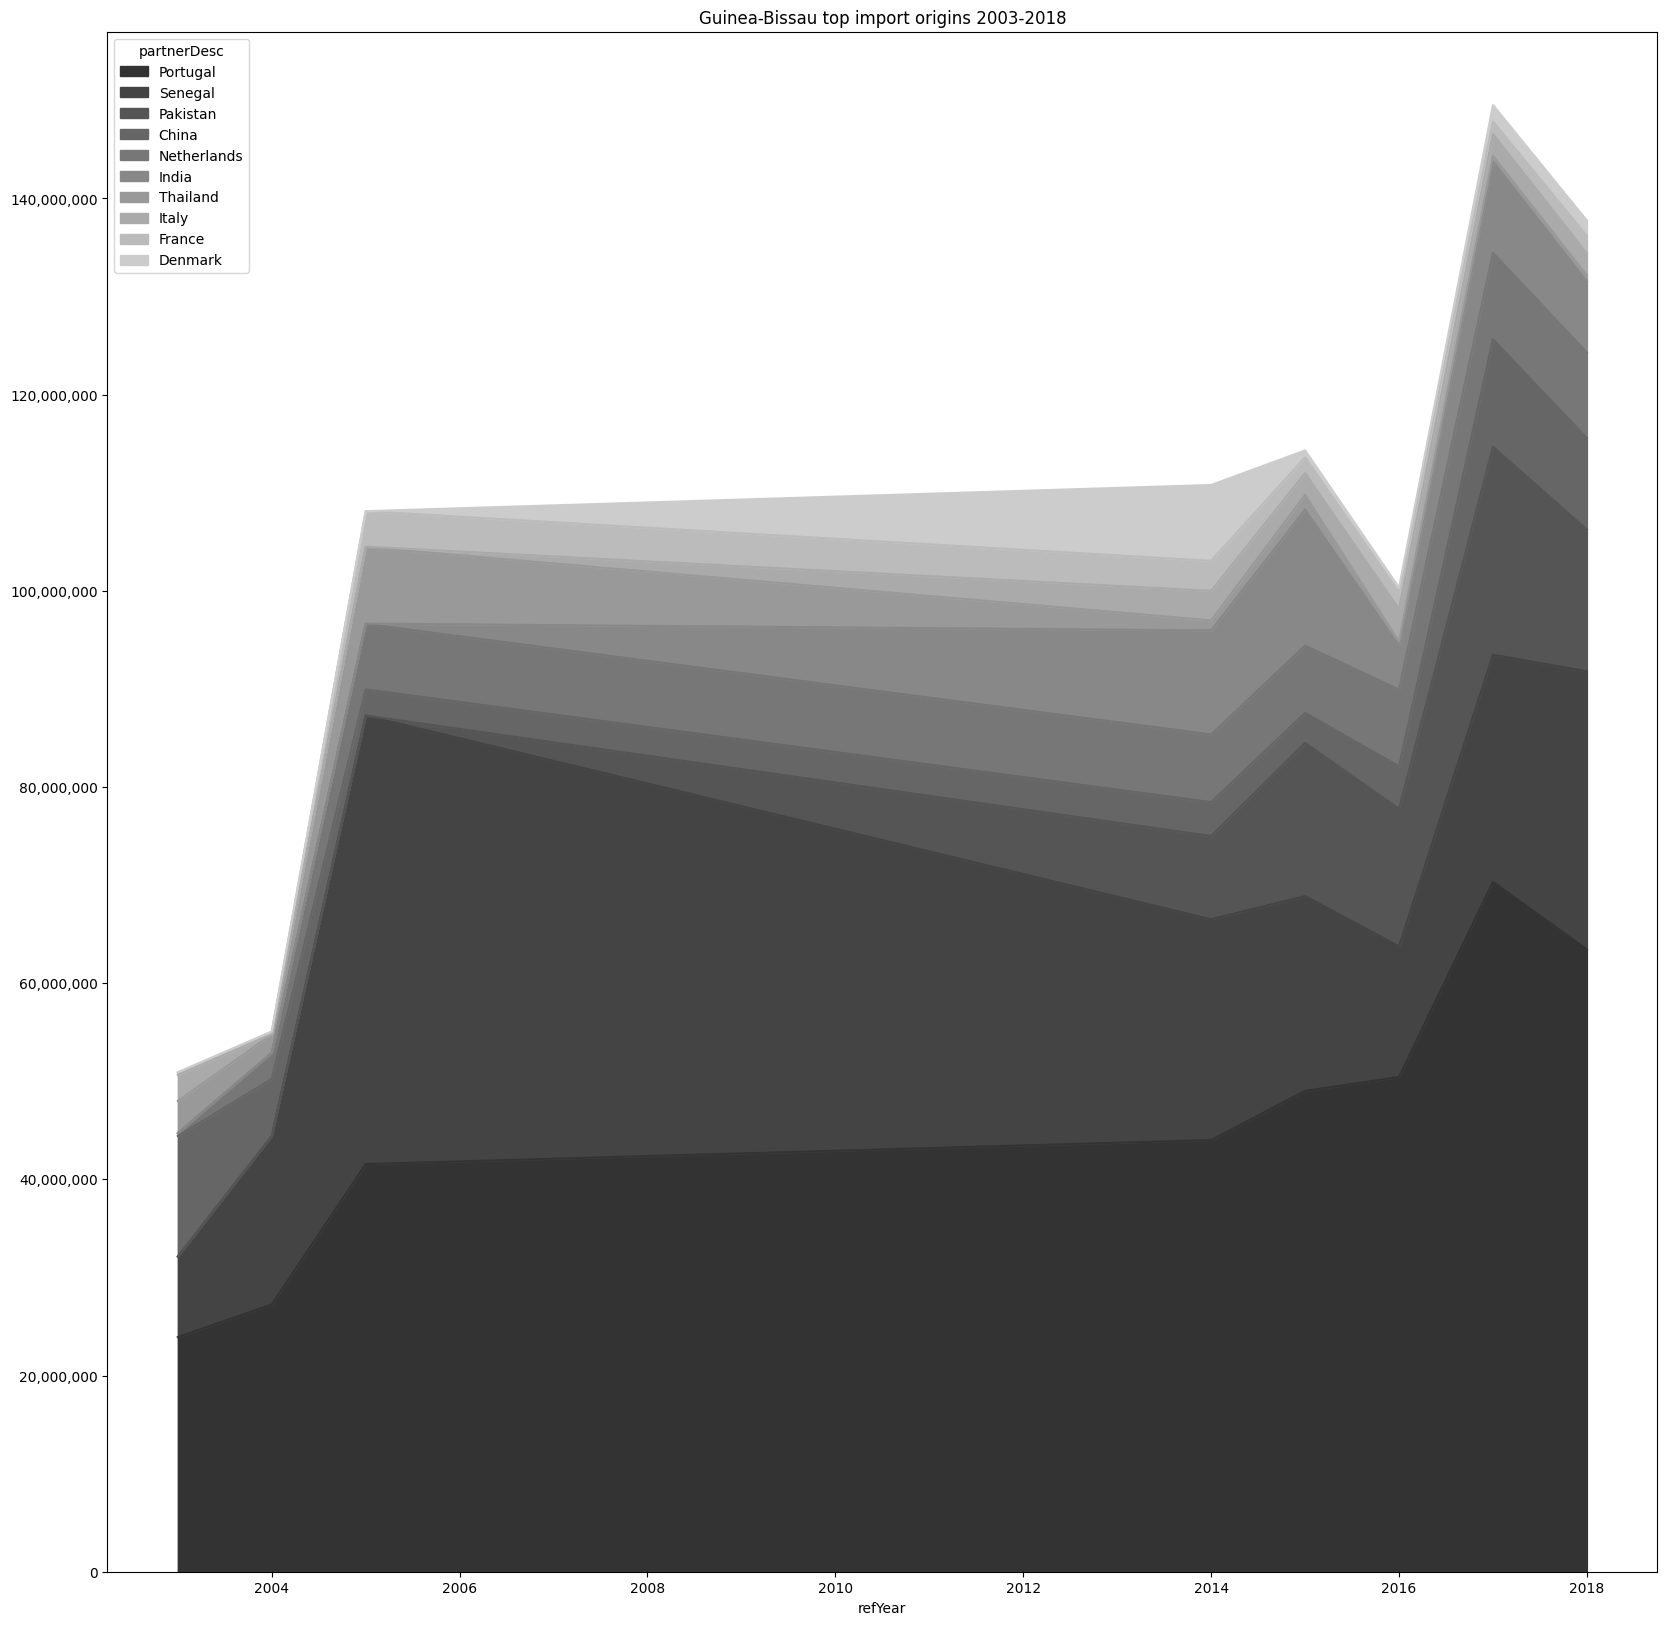

In [77]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [78]:
plotfile

'reports/Guinea-Bissau_3.1.4_import_partners_2003-2018.png'

In [79]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'China'),
 ('partner_perc', 'Denmark'),
 ('partner_perc', 'France'),
 ('partner_perc', 'India'),
 ('partner_perc', 'Italy'),
 ('partner_perc', 'Netherlands'),
 ('partner_perc', 'Pakistan'),
 ('partner_perc', 'Portugal'),
 ('partner_perc', 'Senegal'),
 ('partner_perc', 'Thailand'),
 ('primaryValue', 'China'),
 ('primaryValue', 'Denmark'),
 ('primaryValue', 'France'),
 ('primaryValue', 'India'),
 ('primaryValue', 'Italy'),
 ('primaryValue', 'Netherlands'),
 ('primaryValue', 'Pakistan'),
 ('primaryValue', 'Portugal'),
 ('primaryValue', 'Senegal'),
 ('primaryValue', 'Thailand')]

#### Export to Excel

Table with the top import origins for the period of interest

In [80]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports[cols].sort_values(['refYear','flowCode','partner_rank']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Guinea-Bissau_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Guinea-Bissau_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Guinea-Bissau_3.1.3_import_top_5_partners_2003-2018.xlsx


### 3.2 Imports: products

#### Main imported products

In [81]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Guinea-Bissau 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [82]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [83]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50829), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2004
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50830), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2005
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.p

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43399 entries, 0 to 43398
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  43399 non-null  object 
 1   freqCode                  43399 non-null  object 
 2   refPeriodId               43399 non-null  int64  
 3   refYear                   43399 non-null  int64  
 4   refMonth                  43399 non-null  int64  
 5   period                    43399 non-null  object 
 6   reporterCode              43399 non-null  int64  
 7   reporterISO               43399 non-null  object 
 8   reporterDesc              43399 non-null  object 
 9   flowCode                  43399 non-null  object 
 10  flowDesc                  43399 non-null  object 
 11  partnerCode               43399 non-null  int64  
 12  partnerISO                43399 non-null  object 
 13  partnerDesc               43399 non-null  object 
 14  partne

/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50891), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,


In [84]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2014, 2015, 2016, 2017, 2018]


In [85]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,M,...,900.00,False,NaN,False,523.00,None,523.00,0,False,False
1,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,M,...,"2,600.00",False,NaN,False,"4,722.00",None,"4,722.00",0,False,False
2,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,M,...,8.00,False,NaN,False,121.00,None,121.00,0,False,False
3,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,M,...,340.00,False,NaN,False,"1,172.00",None,"1,172.00",0,False,False
4,C,A,20030101,2003,52,2003,624,GNB,Guinea-Bissau,M,...,"10,000.00",False,NaN,False,349.00,None,349.00,0,False,False


Agreggate by product, keep the top products imported each year

In [86]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 67 to 42468
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  40 non-null     object 
 1   freqCode                  40 non-null     object 
 2   refPeriodId               40 non-null     int64  
 3   refYear                   40 non-null     int64  
 4   refMonth                  40 non-null     int64  
 5   period                    40 non-null     object 
 6   reporterCode              40 non-null     int64  
 7   reporterISO               40 non-null     object 
 8   reporterDesc              40 non-null     object 
 9   flowCode                  40 non-null     object 
 10  flowDesc                  40 non-null     object 
 11  partnerCode               40 non-null     int64  
 12  partnerISO                40 non-null     object 
 13  partnerDesc               40 non-null     object 
 14  partner2Code 

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
319,2003,M,1,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed","$44,528,135",34.860%,H1,6,True,"$127,735,504"
318,2003,M,2,100640,"Cereals; rice, broken","$10,669,212",8.353%,H1,6,True,"$127,735,504"
317,2003,M,3,110100,Wheat or meslin flour,"$4,768,009",3.733%,H1,6,True,"$127,735,504"
67,2003,M,4,252329,"Cement; portland, other than white, whether or not artificially coloured","$4,165,381",3.261%,H1,6,True,"$127,735,504"
774,2003,M,5,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc","$3,909,987",3.061%,H1,6,True,"$127,735,504"
3359,2004,M,1,850211,"Electric generating sets; with compression-ignition internal combustion piston engines (diesel or semi-diesel engines), of an output not exceeding 75kVA","$13,678,929",11.968%,H1,6,True,"$114,293,349"
2534,2004,M,2,271000,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.s., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals","$13,531,230",11.839%,H1,6,True,"$114,293,349"
2565,2004,M,3,220290,"Non-alcoholic beverages; n.e.s. in item no. 2202.10, not including fruit or vegetable juices of heading no. 2009","$9,482,047",8.296%,H1,6,True,"$114,293,349"
2669,2004,M,4,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed","$8,299,751",7.262%,H1,6,True,"$114,293,349"
2559,2004,M,5,220600,"Beverages, fermented; (eg cider, perry, mead)","$5,687,834",4.977%,H1,6,True,"$114,293,349"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [88]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','product_rank','cmdCode','cmdDesc','primaryValue','product_perc']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,product_rank,cmdCode,cmdDesc,primaryValue,product_perc
total,NaN,NaN,NaN,NaN,NaN,0.00,NaN


In [89]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2014, 2015, 2016, 2017, 2018]


#### Export to Excel

In [90]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Guinea-Bissau_3.2_imports_products_HS-AG6-2003-2018.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [91]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [92]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43399 entries, 0 to 43398
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  43399 non-null  object 
 1   freqCode                  43399 non-null  object 
 2   refPeriodId               43399 non-null  int64  
 3   refYear                   43399 non-null  int64  
 4   refMonth                  43399 non-null  int64  
 5   period                    43399 non-null  object 
 6   reporterCode              43399 non-null  int64  
 7   reporterISO               43399 non-null  object 
 8   reporterDesc              43399 non-null  object 
 9   flowCode                  43399 non-null  object 
 10  flowDesc                  43399 non-null  object 
 11  partnerCode               43399 non-null  int64  
 12  partnerISO                43399 non-null  object 
 13  partnerDesc               43399 non-null  object 
 14  partne

In [93]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
25187,2016,M,Guinea-Bissau,Guinea,672.40,200990,"Juices; mixtures, unfermented, not containing added spirit, whether or not containing added sugar or other sweetening matter"
25619,2016,M,Guinea-Bissau,World,"29,178.94",540110,"Sewing thread; of synthetic filaments, whether or not put up for retail sale"
11486,2014,M,Guinea-Bissau,Portugal,963.15,840731,"Engines; reciprocating piston engines, of a kind used for the propulsion of vehicles of chapter 87, of a cylinder capacity not exceeding 50cc"
18644,2015,M,Guinea-Bissau,World,771.79,731582,"Chain; welded link chain, of iron or steel"
32208,2017,M,Guinea-Bissau,China,"1,199.44",821300,"Scissors; tailors' shears, similar shears and blades therefore"
15270,2014,M,Guinea-Bissau,Senegal,"1,004,495.88",851712,Telephones for cellular networks or for other wireless networks
24001,2016,M,Guinea-Bissau,France,"1,882.81",481920,"Paper and paperboard; folding cartons, boxes and cases, of non-corrugated paper or paperboard"
21814,2015,M,Guinea-Bissau,Portugal,278.74,851529,"Welding machines and apparatus; for resistance welding of metal, other than fully or partly automatic, whether or not capable of cutting"
18115,2015,M,Guinea-Bissau,Senegal,349.79,391731,"Plastics; tubes, pipes and hoses thereof, flexible, having a minimum burst pressure of 27.6MPa"
5850,2005,M,Guinea-Bissau,World,278.00,481200,"Paper pulp; filter blocks, slabs and plates of paper pulp"


In [94]:
df.refYear.unique()

array([2003, 2004, 2005, 2014, 2015, 2016, 2017, 2018])

Aggregate by partner and keep the main ones

In [95]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Guinea-Bissau in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['252329' '110100' '100640' '100630' '870323' '271000' '220600' '220290'
 '850211' '271019' '630491' '271011' '080131' '730890' '271012']
   252329: Cement; portland, other than white, whether or not artificially coloured
   110100: Wheat or meslin flour
   100640: Cereals; rice, broken
   100630: Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed
   870323: Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc
   271000: 271000
   220600: Beverages, fermented; (e.g. cider, perry, mead, sake)
   220290: 220290
   850211: Electric generating sets; with compression-ignition internal combustion piston engines (diesel or semi-diesel engines), of an output not exceeding 75kVA
   271019: Petroleum oils and oils from bituminous minerals, not 

/var/folders/x7/qzytnd752559g0w475rfwkx00000gn/T/ipykernel_24682/890561552.py:19: UserWarning: Removing world from data
  warnings.warn("Removing world from data")


### Partners for main import products

In [96]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
1205,2003,M,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",100630,China,1,"$9,105,637",40.898%,"$22,264,068"
1638,2003,M,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",100630,Portugal,2,"$3,652,664",16.406%,"$22,264,068"
2484,2003,M,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",100630,Thailand,3,"$3,274,479",14.707%,"$22,264,068"
2465,2003,M,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",100630,Viet Nam,4,"$2,487,278",11.172%,"$22,264,068"
1454,2003,M,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",100630,Montserrat,5,"$1,465,405",6.582%,"$22,264,068"
1263,2003,M,"Cereals; rice, broken",100640,Italy,1,"$2,479,158",46.473%,"$5,334,606"
2192,2003,M,"Cereals; rice, broken",100640,Senegal,2,"$1,469,107",27.539%,"$5,334,606"
1206,2003,M,"Cereals; rice, broken",100640,China,3,"$1,386,341",25.988%,"$5,334,606"
1639,2003,M,Wheat or meslin flour,110100,Portugal,1,"$1,551,257",65.069%,"$2,384,005"
2193,2003,M,Wheat or meslin flour,110100,Senegal,2,"$264,254",11.084%,"$2,384,005"


In [97]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Guinea-Bissau_3.3_imports_products_partners_HS-AG6-2003-2018.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [98]:
top_import_partners

array(['China', 'Italy', 'Portugal', 'Senegal', 'Thailand', 'Netherlands',
       'France', 'Denmark', 'Pakistan', 'India'], dtype=object)

In [99]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (10): ['China' 'Italy' 'Portugal' 'Senegal' 'Thailand' 'Netherlands' 'France'
 'Denmark' 'Pakistan' 'India']
First rows


refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,M,Portugal,1,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed","$3,652,664",15.267%,"$23,924,715"
2003,M,Portugal,2,110100,Wheat or meslin flour,"$1,551,257",6.484%,"$23,924,715"
2003,M,Portugal,3,220600,"Beverages, fermented; (eg cider, perry, mead)","$1,488,392",6.221%,"$23,924,715"
2003,M,Portugal,4,220421,"Wine; still, in containers holding 2 litres or less","$1,249,689",5.223%,"$23,924,715"
2003,M,Portugal,5,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc","$1,096,472",4.583%,"$23,924,715"
2003,M,China,1,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed","$9,105,637",74.082%,"$12,291,236"
2003,M,China,2,850164,"Electric generators; AC generators, (alternators), of an output exceeding 750kVA","$1,790,505",14.567%,"$12,291,236"
2003,M,China,3,100640,"Cereals; rice, broken","$1,386,341",11.279%,"$12,291,236"
2003,M,China,4,854420,Insulated electric conductors; co-axial cable and other co-axial electric conductors,"$7,881",0.064%,"$12,291,236"
2003,M,China,5,871120,"Motorcycles (including mopeds) and cycles; fitted with an auxiliary motor, reciprocating internal combustion piston engine, of cylinder capacity exceeding 50cc but not exceeding 250cc, with or without side-cars; side-cars",$872,0.007%,"$12,291,236"


Last rows

In [100]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2018,M,Denmark,1,300490,"Medicaments; consisting of mixed or unmixed products n.e.c. in heading no. 3004, for therapeutic or prophylactic uses, packaged for retail sale","$1,301,000",83.526%,"$1,557,593"
2018,M,Denmark,2,300620,Pharmaceutical goods; blood-grouping reagents,"$75,971",4.877%,"$1,557,593"
2018,M,Denmark,3,200990,"Juices; mixtures of fruits or vegetables, unfermented, not containing added spirit, whether or not containing added sugar or other sweetening matter","$38,379",2.464%,"$1,557,593"
2018,M,Denmark,4,220600,"Beverages, fermented; (e.g. cider, perry, mead, sake)","$36,231",2.326%,"$1,557,593"
2018,M,Denmark,5,851769,"Communication apparatus (excluding telephone sets or base stations); machines for the transmission or reception of voice, images or other data (including wired/wireless networks), n.e.c. in item no. 8517.6","$33,858",2.174%,"$1,557,593"
2018,M,Thailand,1,100640,"Cereals; rice, broken","$597,498",93.105%,"$641,746"
2018,M,Thailand,2,481013,"Paper and paperboard; coated with kaolin or other inorganic substances, for printing & writing, graphics, containing no, or not more than 10% by weight of total fibres obtained by mechanical or chemi-mechanical process, in rolls","$19,246",2.999%,"$641,746"
2018,M,Thailand,3,200990,"Juices; mixtures of fruits or vegetables, unfermented, not containing added spirit, whether or not containing added sugar or other sweetening matter","$12,348",1.924%,"$641,746"
2018,M,Thailand,4,481014,"Paper and paperboard; coated with kaolin or other inorganic substances, for printing/writing/graphics, having 10% or less by weight of total fibres got mechanical/chemi-mechanical process, sheets, sides 435mm or less by 297mm or less, unfolded,","$9,678",1.508%,"$641,746"
2018,M,Thailand,5,220210,"Waters; including mineral and aerated, containing added sugar or other sweetening matter or flavoured","$2,973",0.463%,"$641,746"


#### Export to Excel

In [101]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Guinea-Bissau_3.4_imports_partners_products_HS-AG6-2003-2018.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [102]:
top_import_products_codes

array(['252329', '110100', '100640', '100630', '870323', '271000',
       '220600', '220290', '850211', '271019', '630491', '271011',
       '080131', '730890', '271012'], dtype=object)

In [103]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

48

In [104]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [105]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

INFO:root:Calling getFinalData for period 2003


Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  764,586,620,686,528,156,208,251,380,699
cmdCodeCSV:  220600,870323,220290,100630,850211,252329,080131,110100,271019,271011,271000,100640,730890,630491,271012


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50930), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2004
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 50936), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2005
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket

Countries also buying top imports of country of interest from the same suppliers

In [106]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['China',
  'Denmark',
  'France',
  'Italy',
  'Senegal',
  'Portugal',
  'Pakistan',
  'Netherlands',
  'India',
  'Thailand'],
 ['Argentina',
  'Australia',
  'Austria',
  'Belgium',
  'Brazil',
  'Brunei Darussalam',
  'Myanmar',
  'Cambodia',
  'Canada',
  'Sri Lanka',
  'Chile',
  'Congo',
  'Czechia',
  'Benin',
  'Denmark',
  'France',
  'Germany',
  'Ghana',
  'China, Hong Kong SAR',
  'Hungary',
  'Indonesia',
  'Israel',
  'Italy',
  'Jamaica',
  'Japan',
  "Dem. People's Rep. of Korea",
  'Rep. of Korea',
  "Lao People's Dem. Rep.",
  'Latvia',
  'Libya',
  'Luxembourg',
  'China, Macao SAR',
  'Malaysia',
  'Mauritania',
  'Mauritius',
  'Other Asia, nes',
  'Oceania, nes',
  'Netherlands',
  'New Zealand',
  'Nigeria',
  'Norway',
  'FS Micronesia',
  'Marshall Isds',
  'Peru',
  'Philippines',
  'Poland',
  'Portugal',
  'Russian Federation',
  'Singapore',
  'Slovakia',
  'Viet Nam',
  'Slovenia',
  'South Africa',
  'Spain',
  'Thailand',
  'United Arab Emirates',
  '

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [107]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Côte d'Ivoire,1,"$146,527,078",32.615%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Russian Federation,2,"$63,127,945",14.051%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Japan,3,"$35,531,343",7.909%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Papua New Guinea,4,"$28,349,821",6.310%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Indonesia,5,"$22,735,722",5.061%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Guinea-Bissau,20,"$3,587,400",0.798%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2004,Japan,1,"$46,821,796",25.792%,"$181,537,026"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2004,Russian Federation,2,"$33,704,260",18.566%,"$181,537,026"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2004,Côte d'Ivoire,3,"$29,955,057",16.501%,"$181,537,026"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2004,Liberia,4,"$21,157,514",11.655%,"$181,537,026"


In [108]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2003,Guinea-Bissau,20,"$3,587,400",0.798%,"$449,267,733"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2004,Guinea-Bissau,12,"$1,162,598",0.640%,"$181,537,026"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2010,Guinea-Bissau,21,"$1,084,237",0.396%,"$273,471,499"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2013,Guinea-Bissau,8,"$870,352",0.458%,"$190,164,076"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2017,Guinea-Bissau,8,"$16,316,166",3.892%,"$419,181,558"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2018,Guinea-Bissau,18,"$9,373,461",1.367%,"$685,502,356"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2019,Guinea-Bissau,23,"$9,088,000",1.037%,"$876,542,719"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2020,Guinea-Bissau,12,"$17,207,500",2.592%,"$663,949,349"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2021,Guinea-Bissau,14,"$20,996,000",2.817%,"$745,275,925"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2022,Guinea-Bissau,13,"$13,392,552",1.827%,"$732,980,940"


#### Export to Excel


In [109]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Guinea-Bissau_3.5.1_import_partners_alternative.xlsx


In [110]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Guinea-Bissau_3.5.2_import_partners_alternative_relevant.xlsx


In [111]:
from datetime import datetime

current_datetime = datetime.now()
print(f"End run for {country_of_interest_name}:", current_datetime)

End run for Guinea-Bissau: 2024-06-20 07:54:10.826057


In [112]:
"Done"

'Done'